In [54]:
import pickle
import pandas as pd
import numpy as np
from ipywidgets import interact
from matplotlib import pyplot as plt


In [55]:
df = pd.read_excel("Volve production data.xlsx")

In [56]:
df.head(10).columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [57]:
first_set_to_drop=['WELL_BORE_CODE','NPD_WELL_BORE_NAME','NPD_FIELD_CODE','NPD_FIELD_NAME','NPD_FACILITY_CODE','NPD_FACILITY_NAME','NPD_WELL_BORE_NAME','AVG_CHOKE_UOM','BORE_WI_VOL','FLOW_KIND','WELL_TYPE']
df = df.drop(first_set_to_drop, axis=1)

In [46]:
df

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0     2014-04-07                7405            0.0                0.00000   
1     2014-04-08                7405            0.0                    NaN   
2     2014-04-09                7405            0.0                    NaN   
3     2014-04-10                7405            0.0                    NaN   
4     2014-04-11                7405            0.0              310.37614   
...          ...                 ...            ...                    ...   
15629 2016-09-14                5769            0.0                    NaN   
15630 2016-09-15                5769            0.0                    NaN   
15631 2016-09-16                5769            0.0                    NaN   
15632 2016-09-17                5769            0.0                    NaN   
15633 2016-09-18                5769            0.0                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                       0.00000        0.00000            0.00000   
1                           NaN            NaN            0.00000   
2                           NaN            NaN            0.00000   
3                           NaN            NaN            0.00000   
4                      96.87589      277.27826            0.00000   
...                         ...            ...                ...   
15629                       NaN            NaN            0.27272   
15630                       NaN            NaN            0.28686   
15631                       NaN            NaN            0.28604   
15632                       NaN            NaN            0.27212   
15633                       NaN            NaN                NaN   

       AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0              0.000000    0.00000    0.00000        0.00000           0.0   
1              1.003059    0.00000    0.00000        0.00000           0.0   
2              0.979008    0.00000    0.00000        0.00000           0.0   
3              0.545759    0.00000    0.00000        0.00000           0.0   
4              1.215987   33.09788   10.47992       33.07195           0.0   
...                 ...        ...        ...            ...           ...   
15629          0.636088    0.07776    0.22879        0.01862           0.0   
15630          0.670794    0.08545    0.22914        0.00631           0.0   
15631          0.664393    0.08544    0.22896        0.01181           0.0   
15632          0.624660    0.07497    0.22846        0.02576           0.0   
15633               NaN        NaN        NaN        0.00000           NaN   

       BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
0               0.0           0.0          NaN  
1               0.0           0.0          NaN  
2               0.0           0.0          NaN  
3               0.0           0.0          NaN  
4               0.0           0.0          NaN  
...             ...           ...          ...  
15629           0.0           0.0          NaN  
15630           0.0           0.0          NaN  
15631           0.0           0.0          NaN  
15632           0.0           0.0          NaN  
15633           NaN           NaN          0.0  

[15634 rows x 15 columns]

<Axes: >

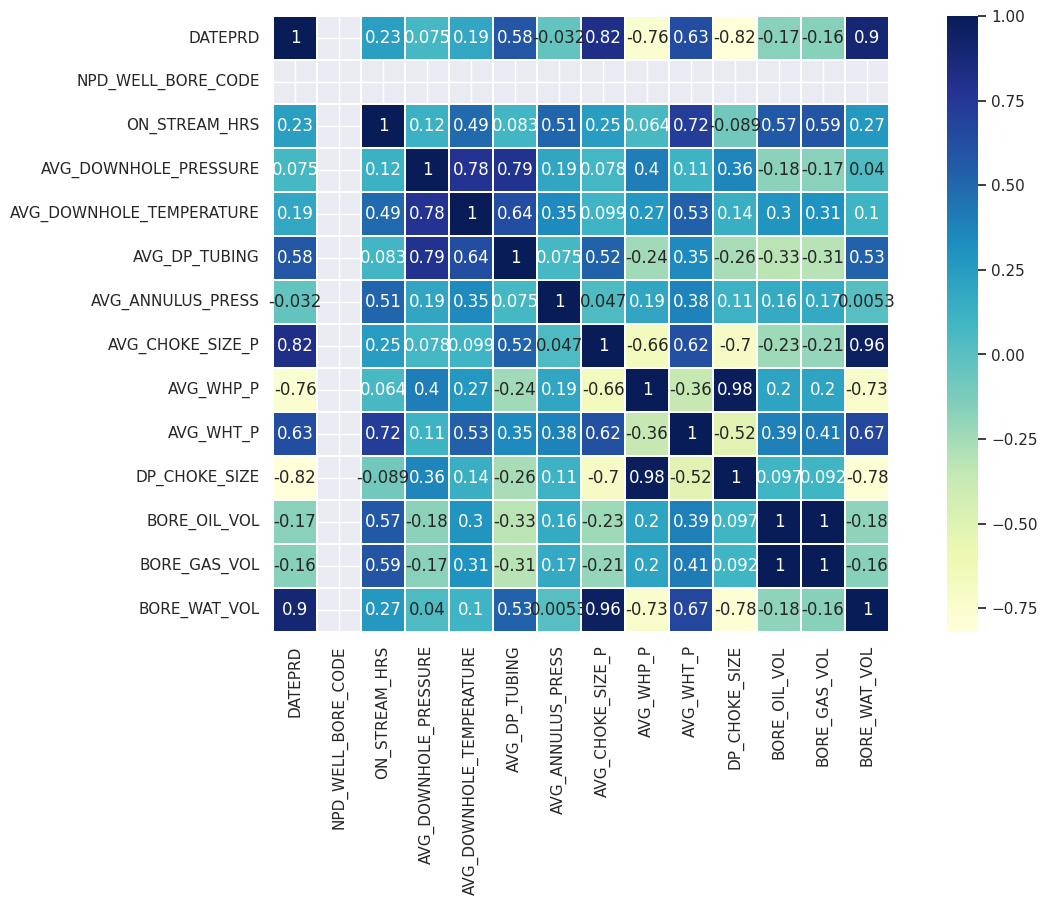

In [58]:
import matplotlib.pyplot as plt

# Filtrar los datos para el pozo con el código 7078
df1 = df[df["NPD_WELL_BORE_CODE"] == 7078]

import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(df1.corr(),square=True,cmap='YlGnBu',annot=True,linewidths = .1)


In [10]:
X_7078.shape

(1165, 24)

# Data Preparation

In [70]:
first_set_to_drop=['DATEPRD','NPD_WELL_BORE_CODE','BORE_OIL_VOL','BORE_GAS_VOL','BORE_WAT_VOL']
dfnew = df1.drop(first_set_to_drop, axis=1)

In [71]:
dfnew.head()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
746            0.0                    0.0                       0.0   
747            0.0                    0.0                       0.0   
748            0.0                    NaN                       NaN   
749            0.0                    0.0                       0.0   
750            0.0                    NaN                       NaN   

     AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  \
746            0.0                0.0               0.0        0.0        0.0   
747            0.0                0.0               0.0        0.0        0.0   
748            NaN                NaN               NaN        NaN        NaN   
749            0.0                0.0               0.0        0.0        0.0   
750            NaN                NaN               NaN        NaN        NaN   

     DP_CHOKE_SIZE  
746            0.0  
747            0.0  
748            NaN  
749            0.0  
750            NaN

In [72]:
dfnew.dropna(inplace=True)

In [73]:
dfnew.isnull().sum()

ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
dtype: int64

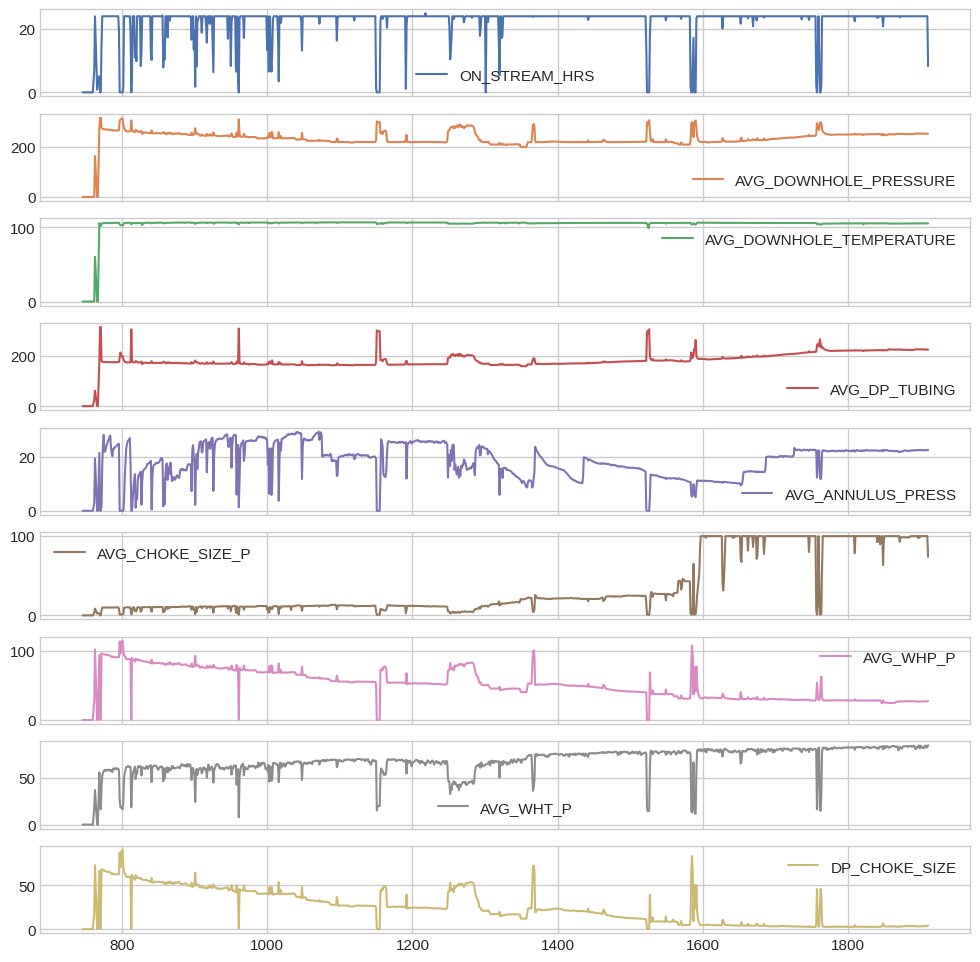

In [76]:
dfnew.plot(subplots=True,figsize=(12,12));
fig.patch.set_facecolor('white')

In [ ]:
wellnames = dfnew['NPD_WELL_BORE_NAME'].unique()
wellnames

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D'],
      dtype=object)

In [ ]:
import seaborn as sns

In [ ]:

@interact
def pairplot_with_hue(well=wellnames):
    df_filtered = dfnew[dfnew['NPD_WELL_BORE_NAME'] == well]
    if 'species' in df_filtered.columns:
        sns.pairplot(df_filtered, hue="NPD_WELL_BORE_NAME")
    else:
        print("La columna 'species' no está presente en el DataFrame filtrado.")

interactive(children=(Dropdown(description='well', options=('15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14…

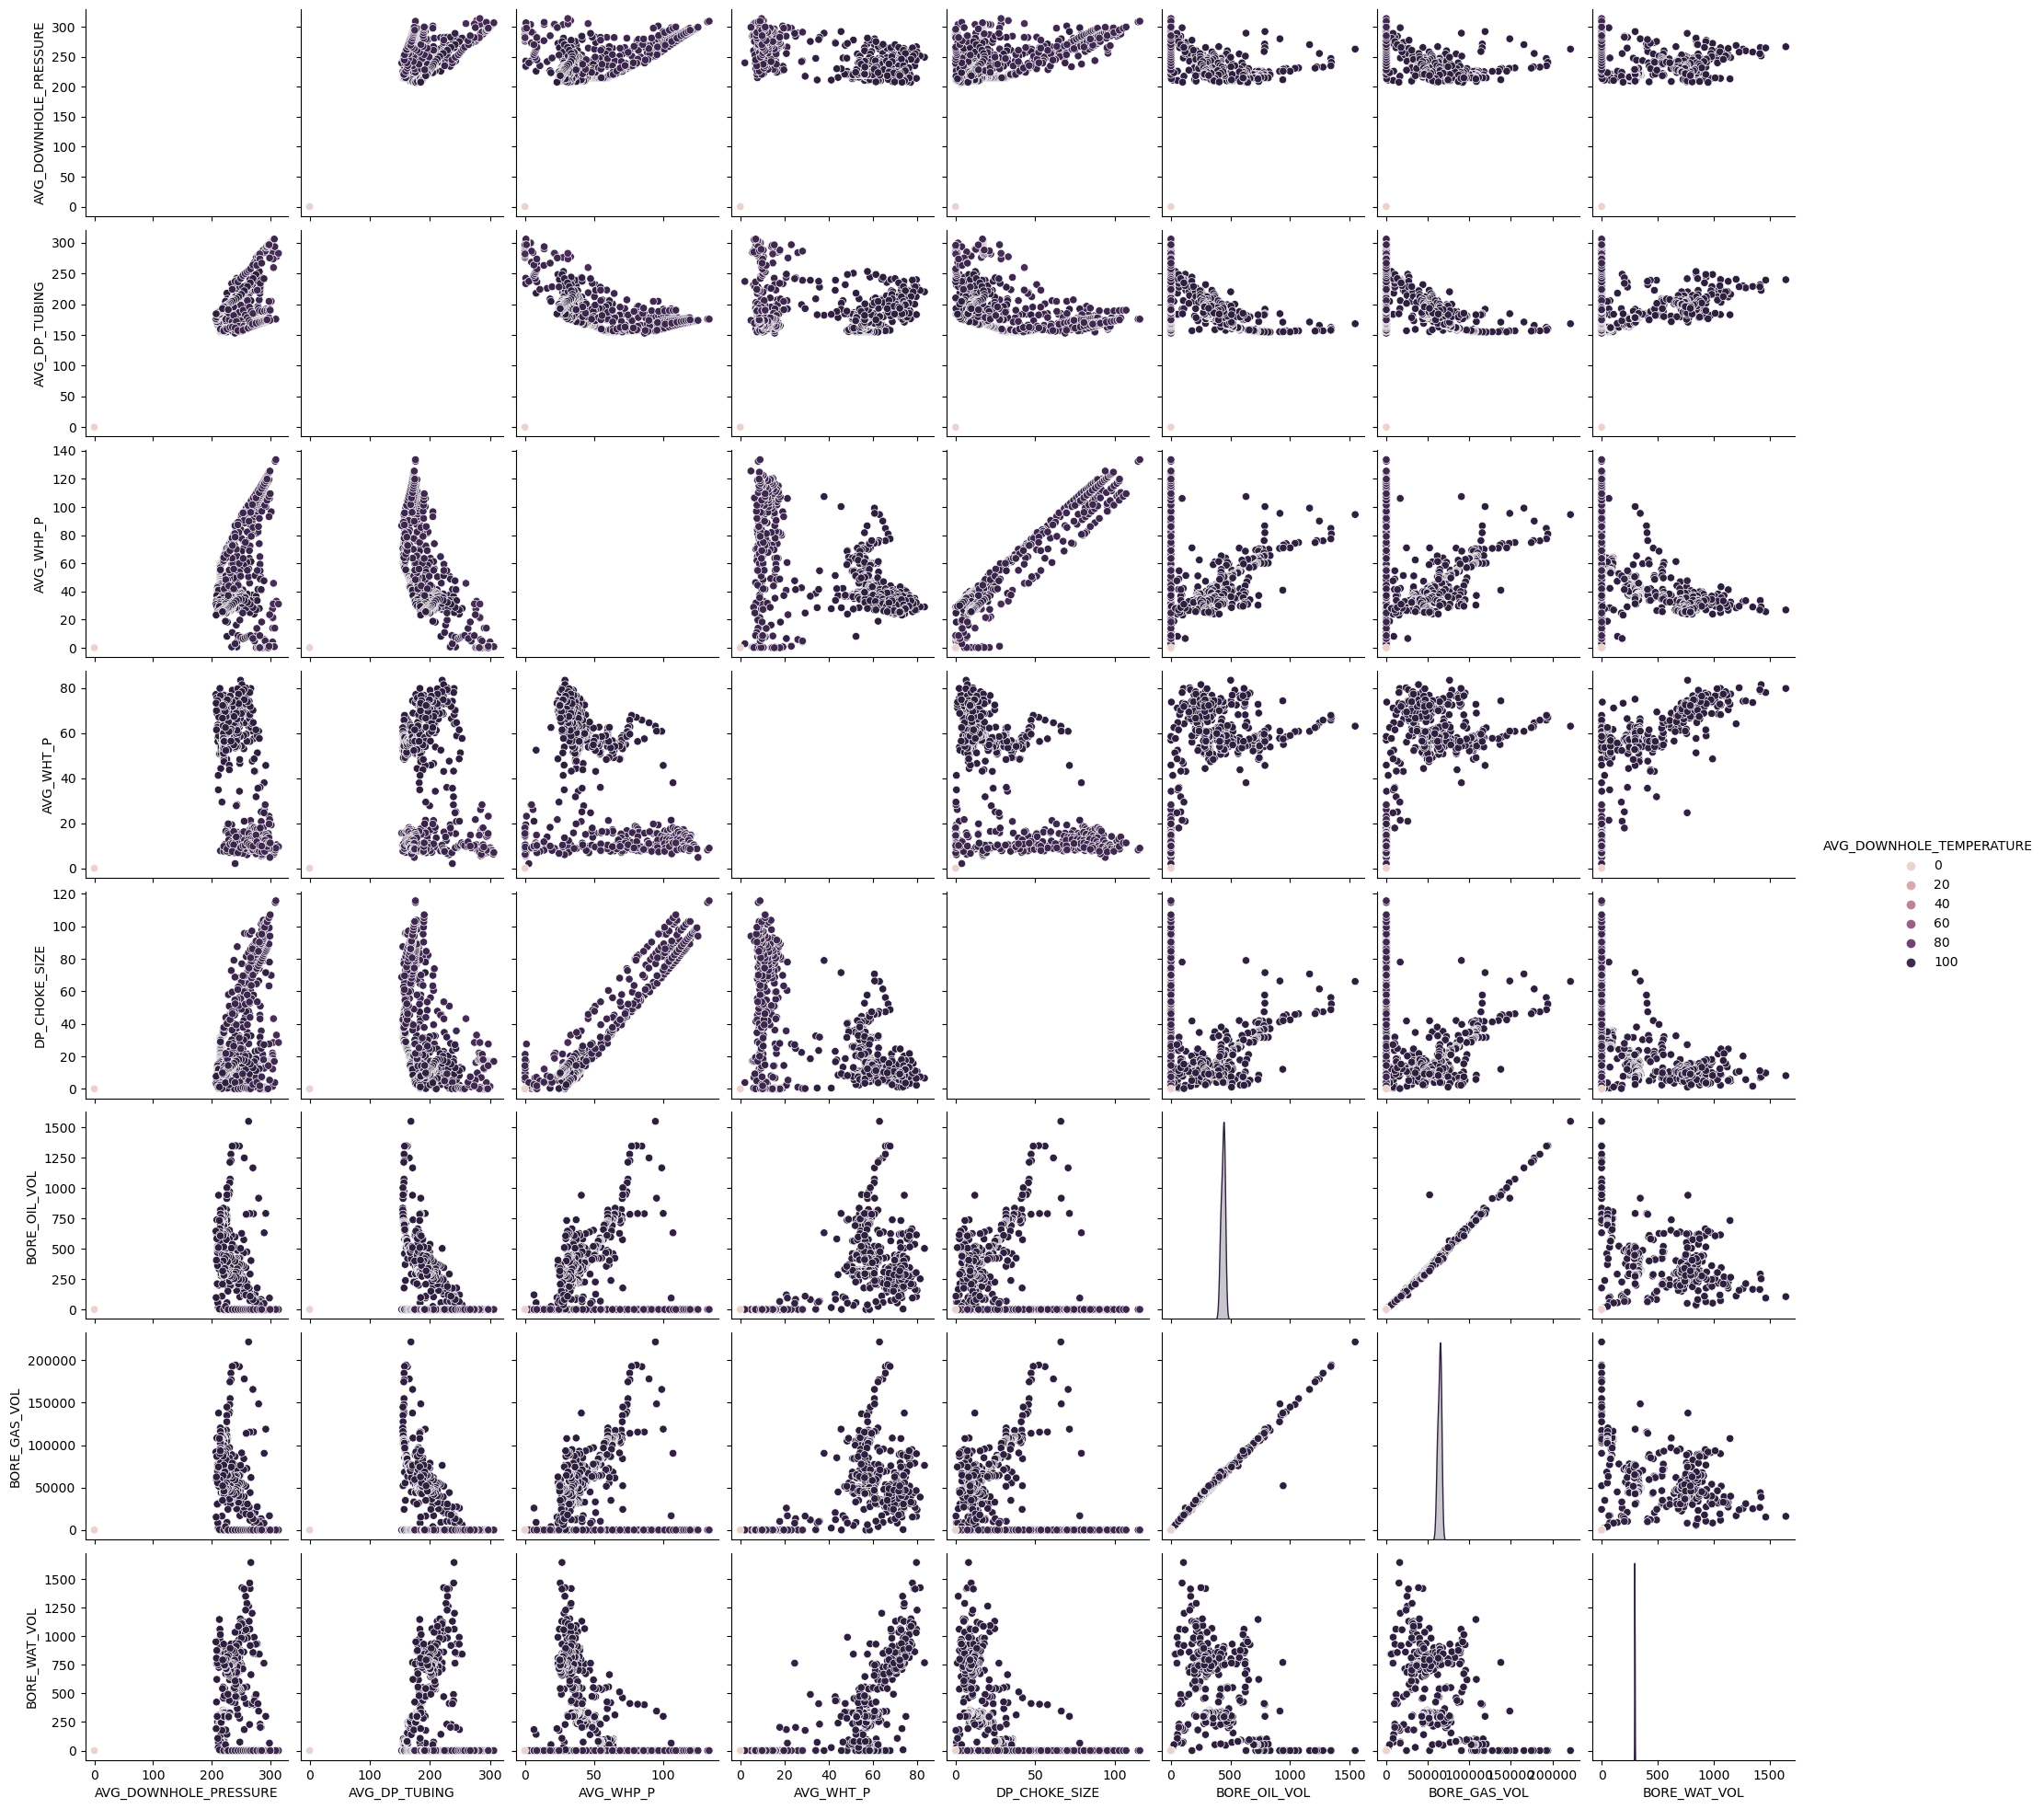

In [ ]:
sns.pairplot(dfnew[dfnew['NPD_WELL_BORE_NAME'] == wellnames[0]], hue='AVG_DOWNHOLE_TEMPERATURE')

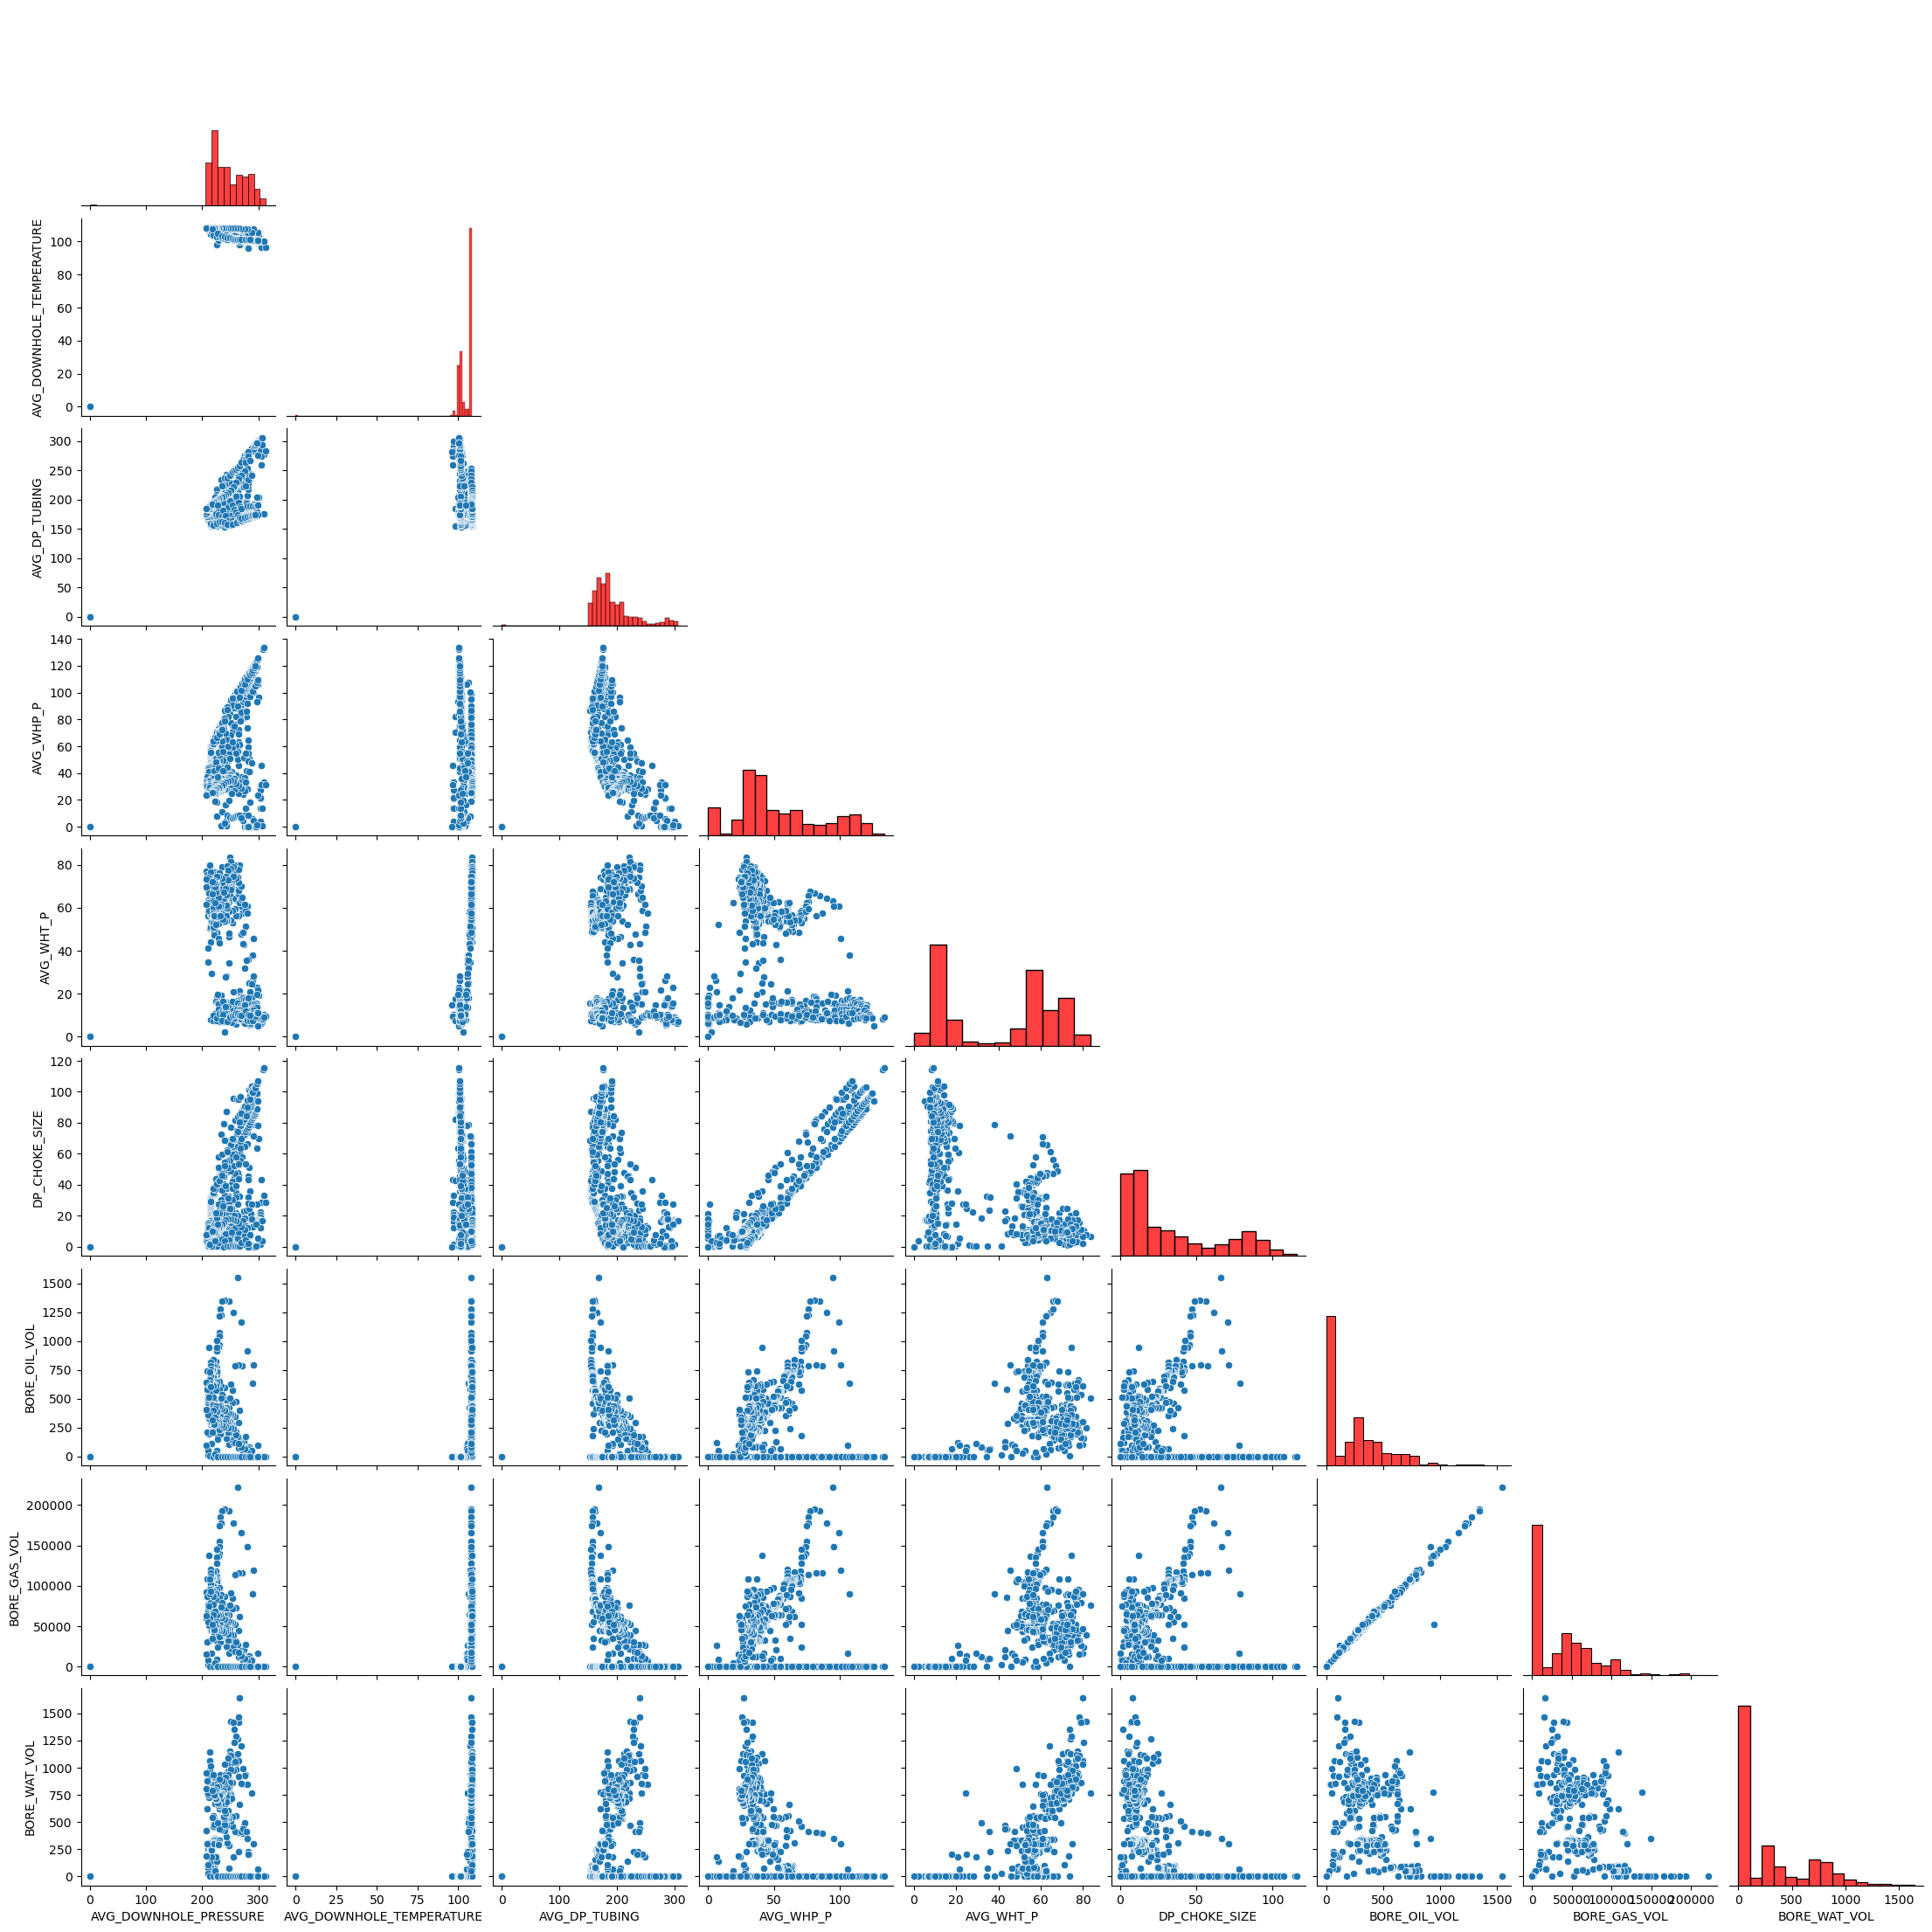

In [ ]:
sns.pairplot(dfnew[dfnew['NPD_WELL_BORE_NAME'] == wellnames[0]], corner = True, diag_kws={ 'color':'red' })

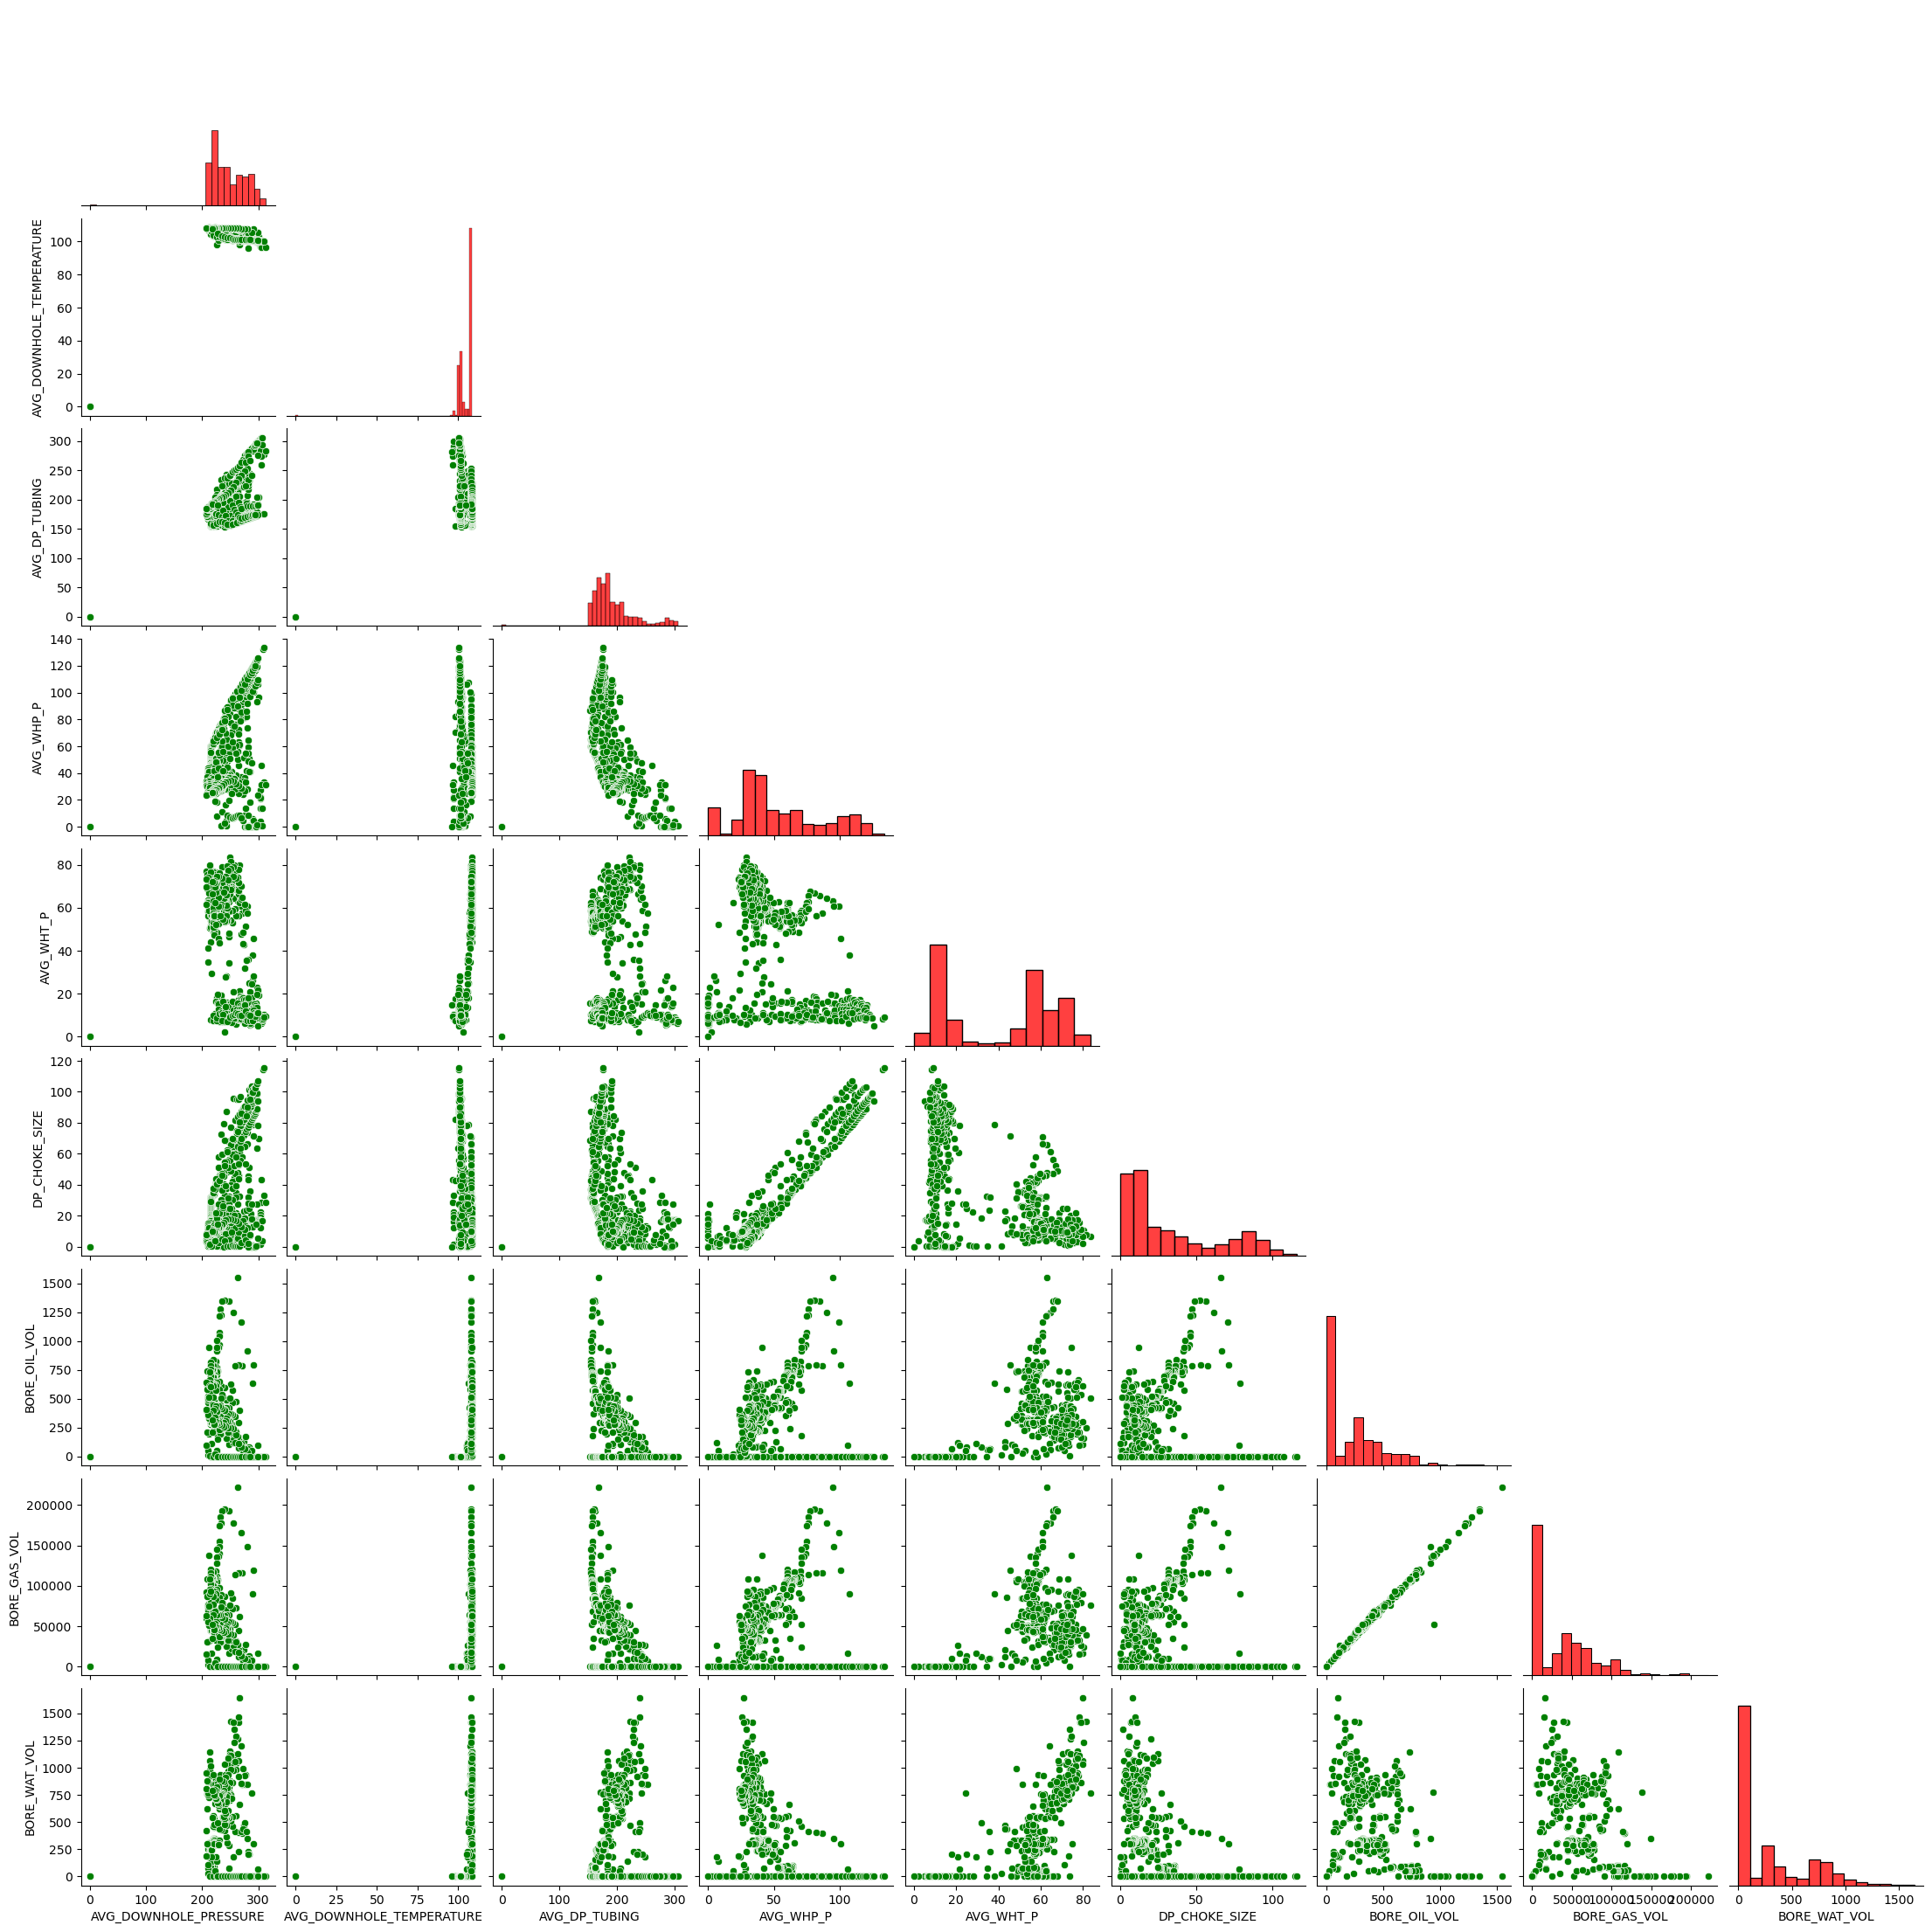

In [ ]:
#sns.pairplot(dfnew[dfnew['NPD_WELL_BORE_NAME']== wellnames[0]])

sns.pairplot(dfnew[dfnew['NPD_WELL_BORE_NAME'] == wellnames[0]], corner = True, diag_kws={ 'color':'red' },plot_kws={ 'color':'green'})

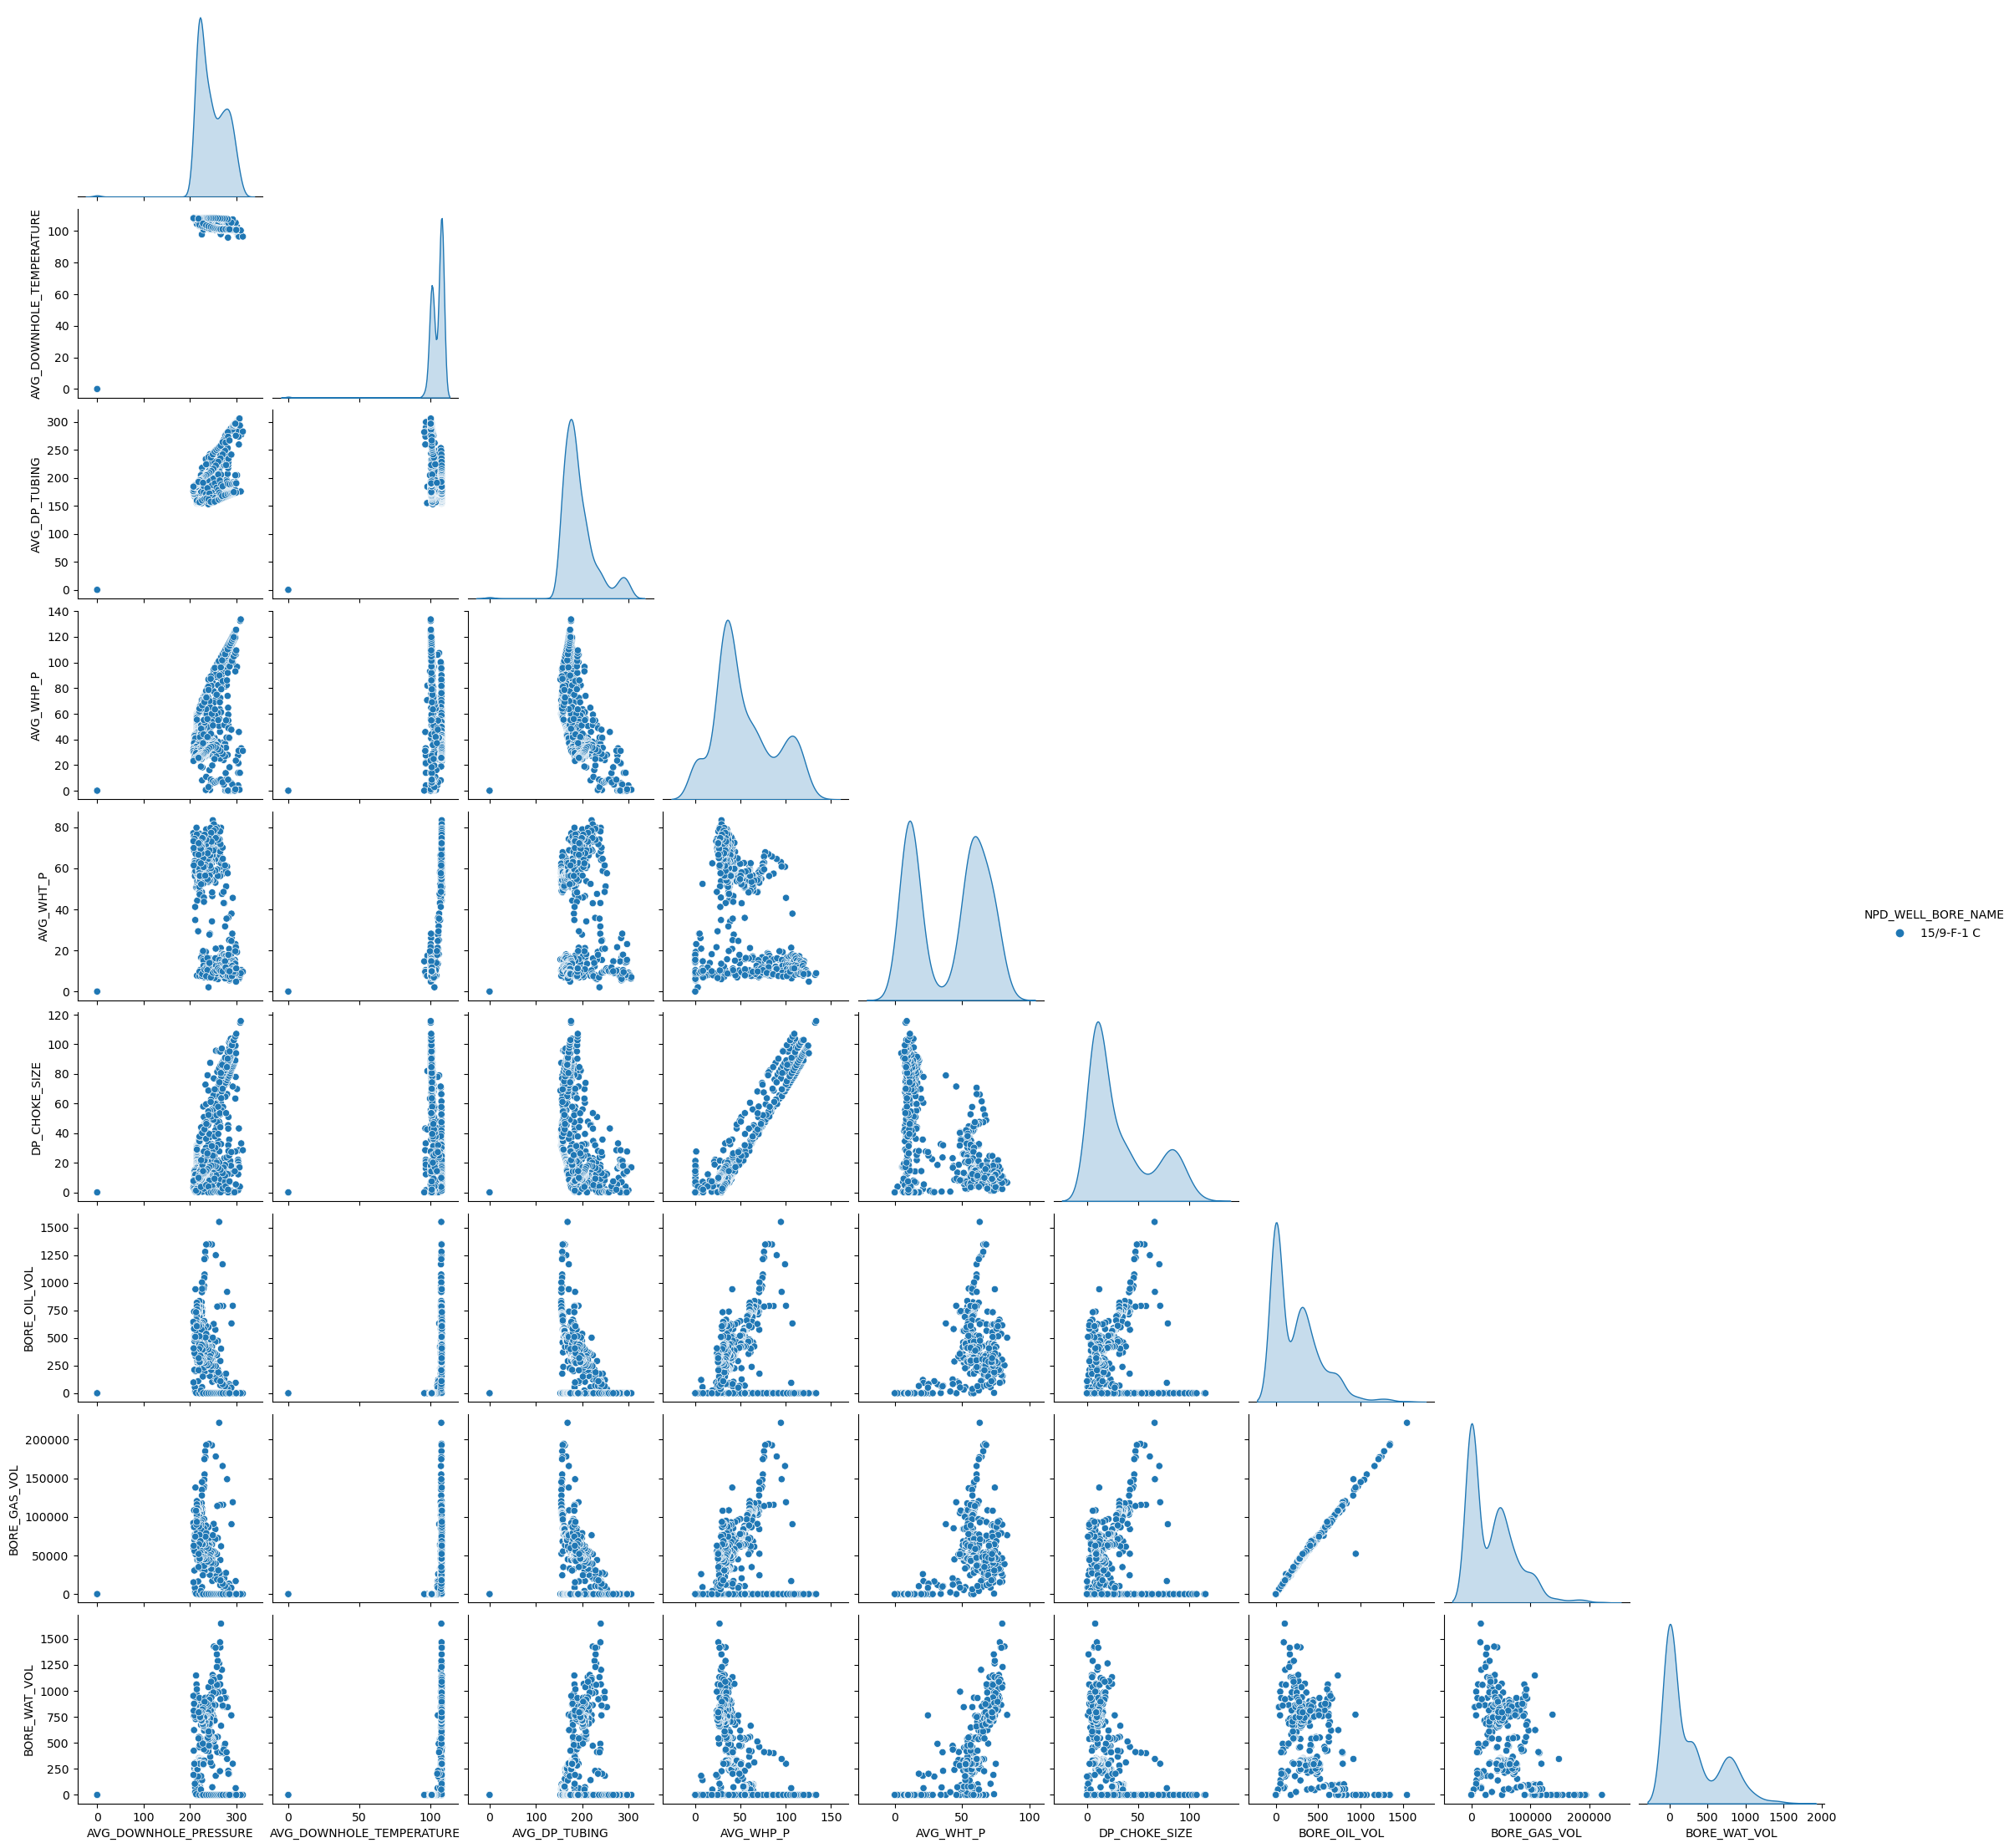

In [ ]:
sns.pairplot(dfnew[dfnew['NPD_WELL_BORE_NAME'] == wellnames[0]],hue="NPD_WELL_BORE_NAME", corner = True, diag_kws={ 'color':'red' },plot_kws={ 'color':'blue'})

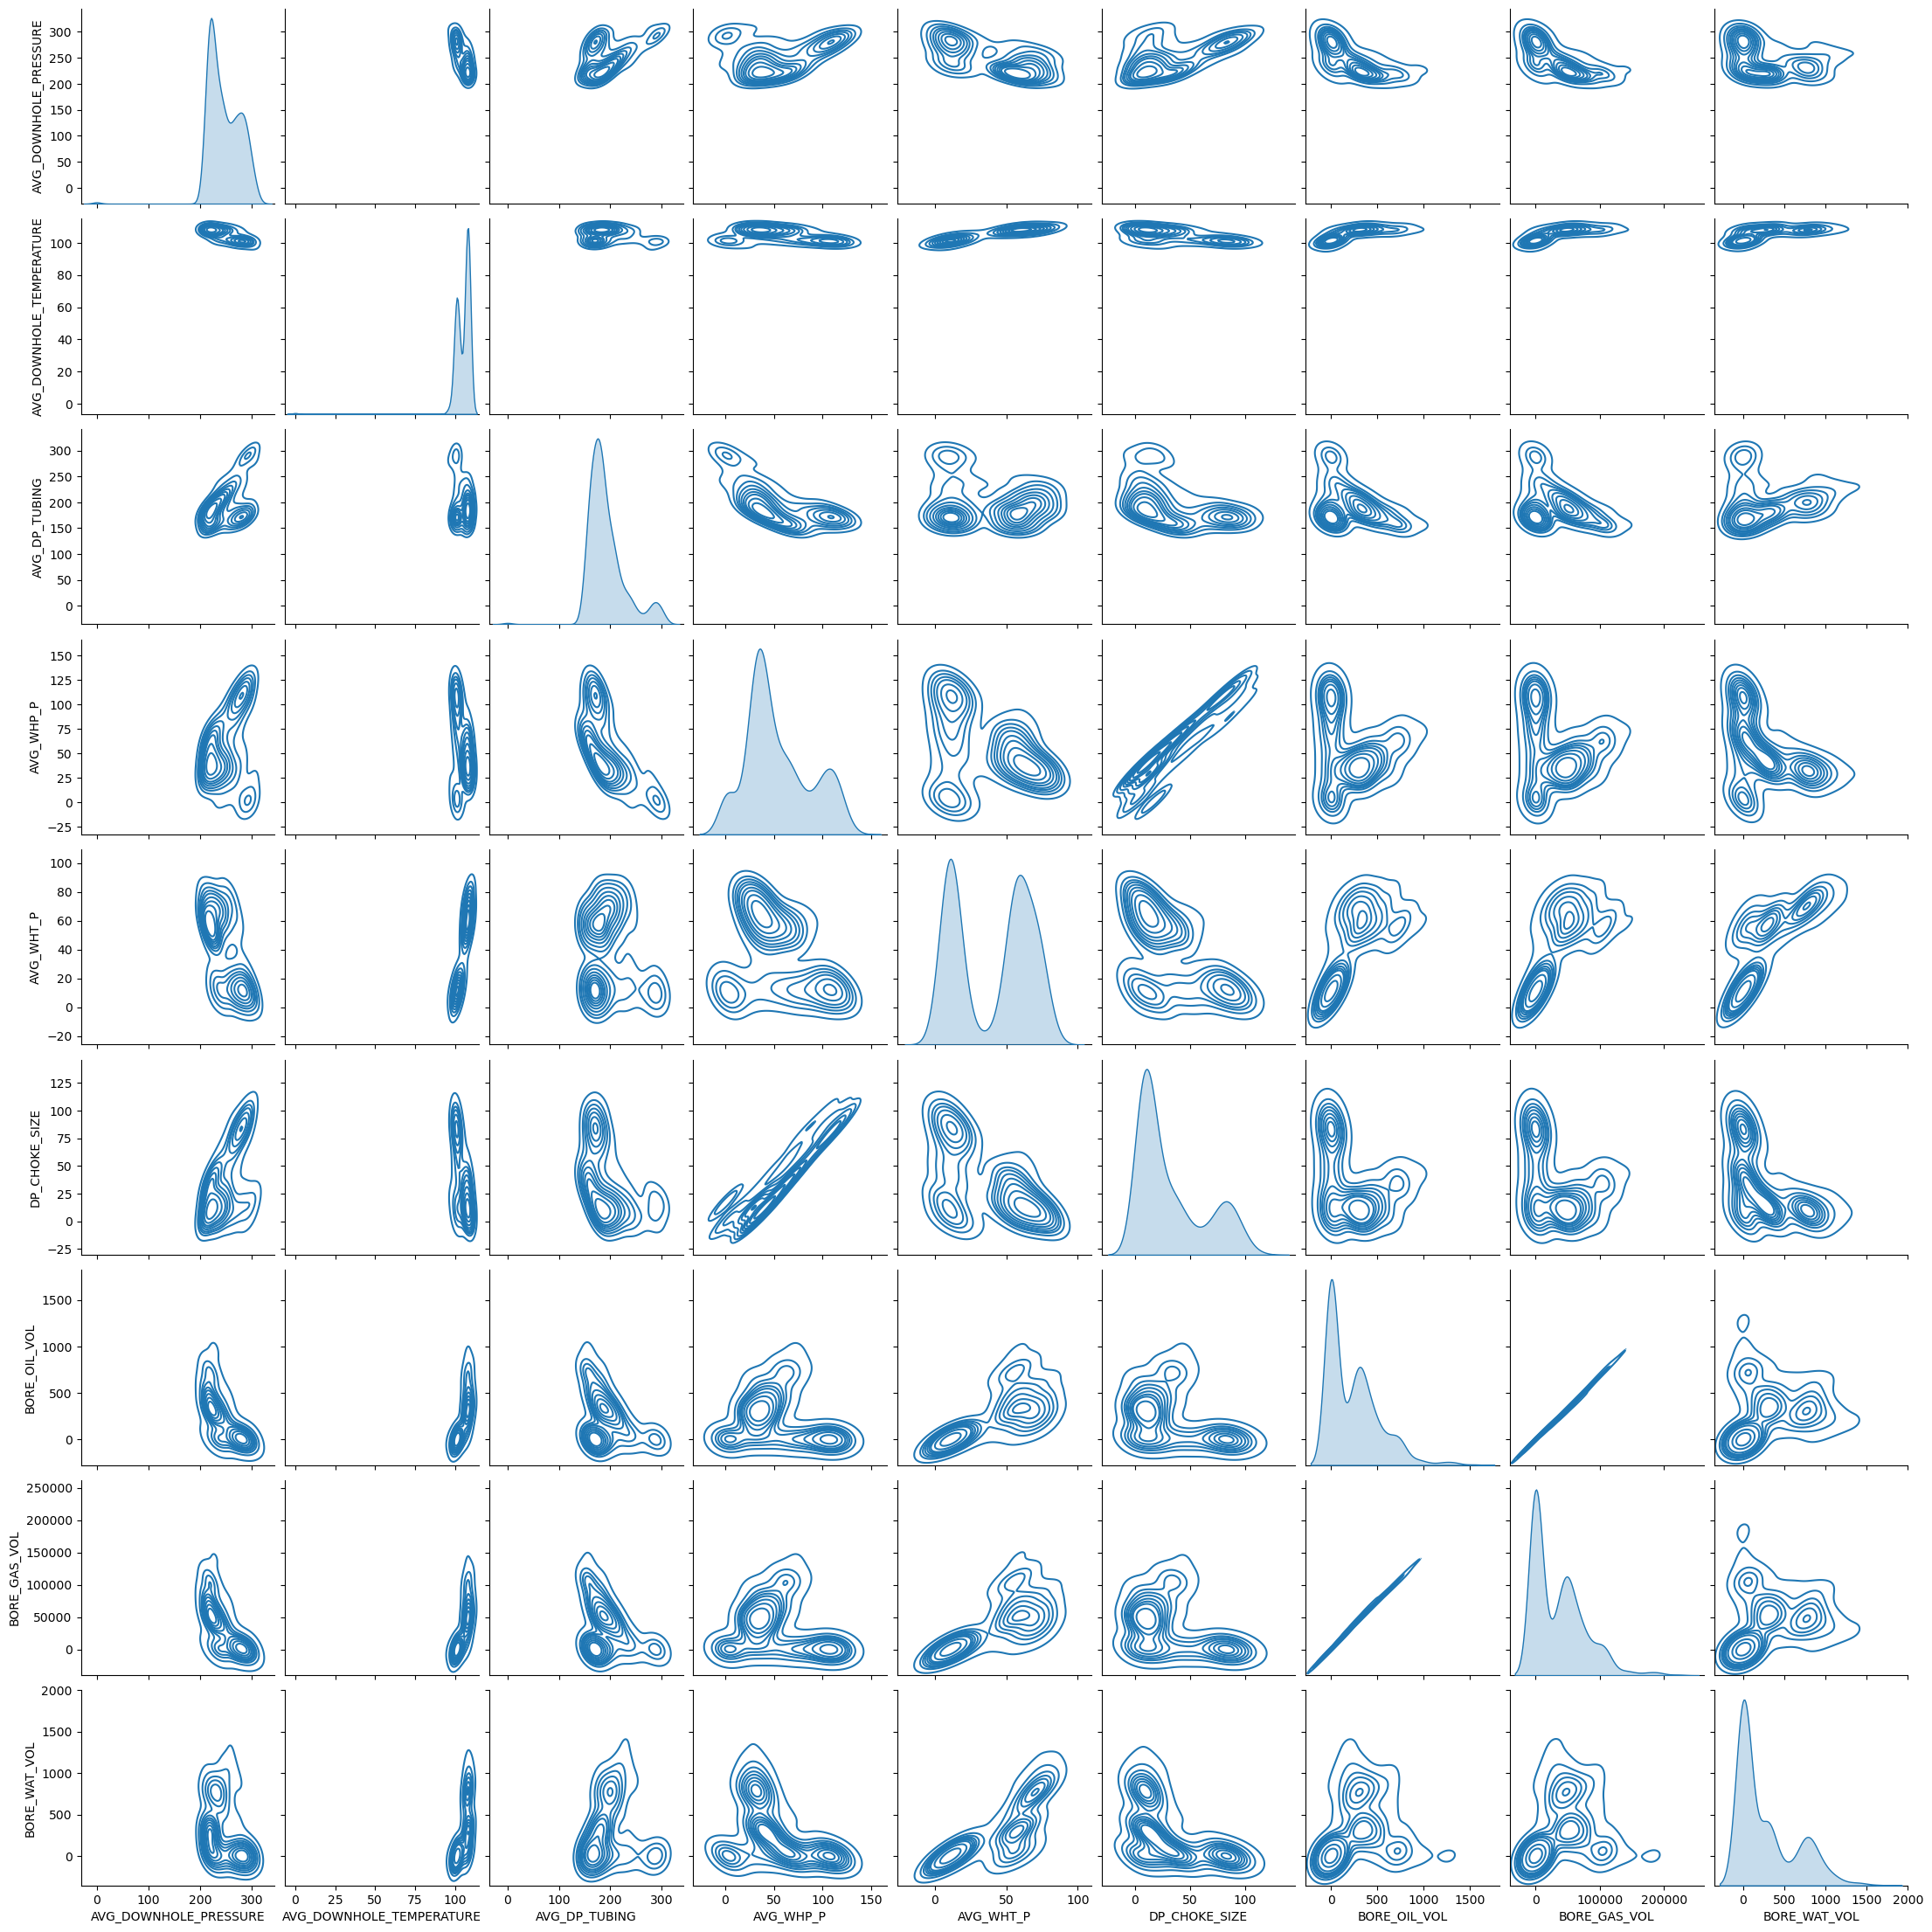

In [ ]:
sns.pairplot(dfnew[dfnew['NPD_WELL_BORE_NAME'] == wellnames[0]], kind = "kde")

C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has mo

C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\CarlosDaniel\Anacondanuevo\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has mo

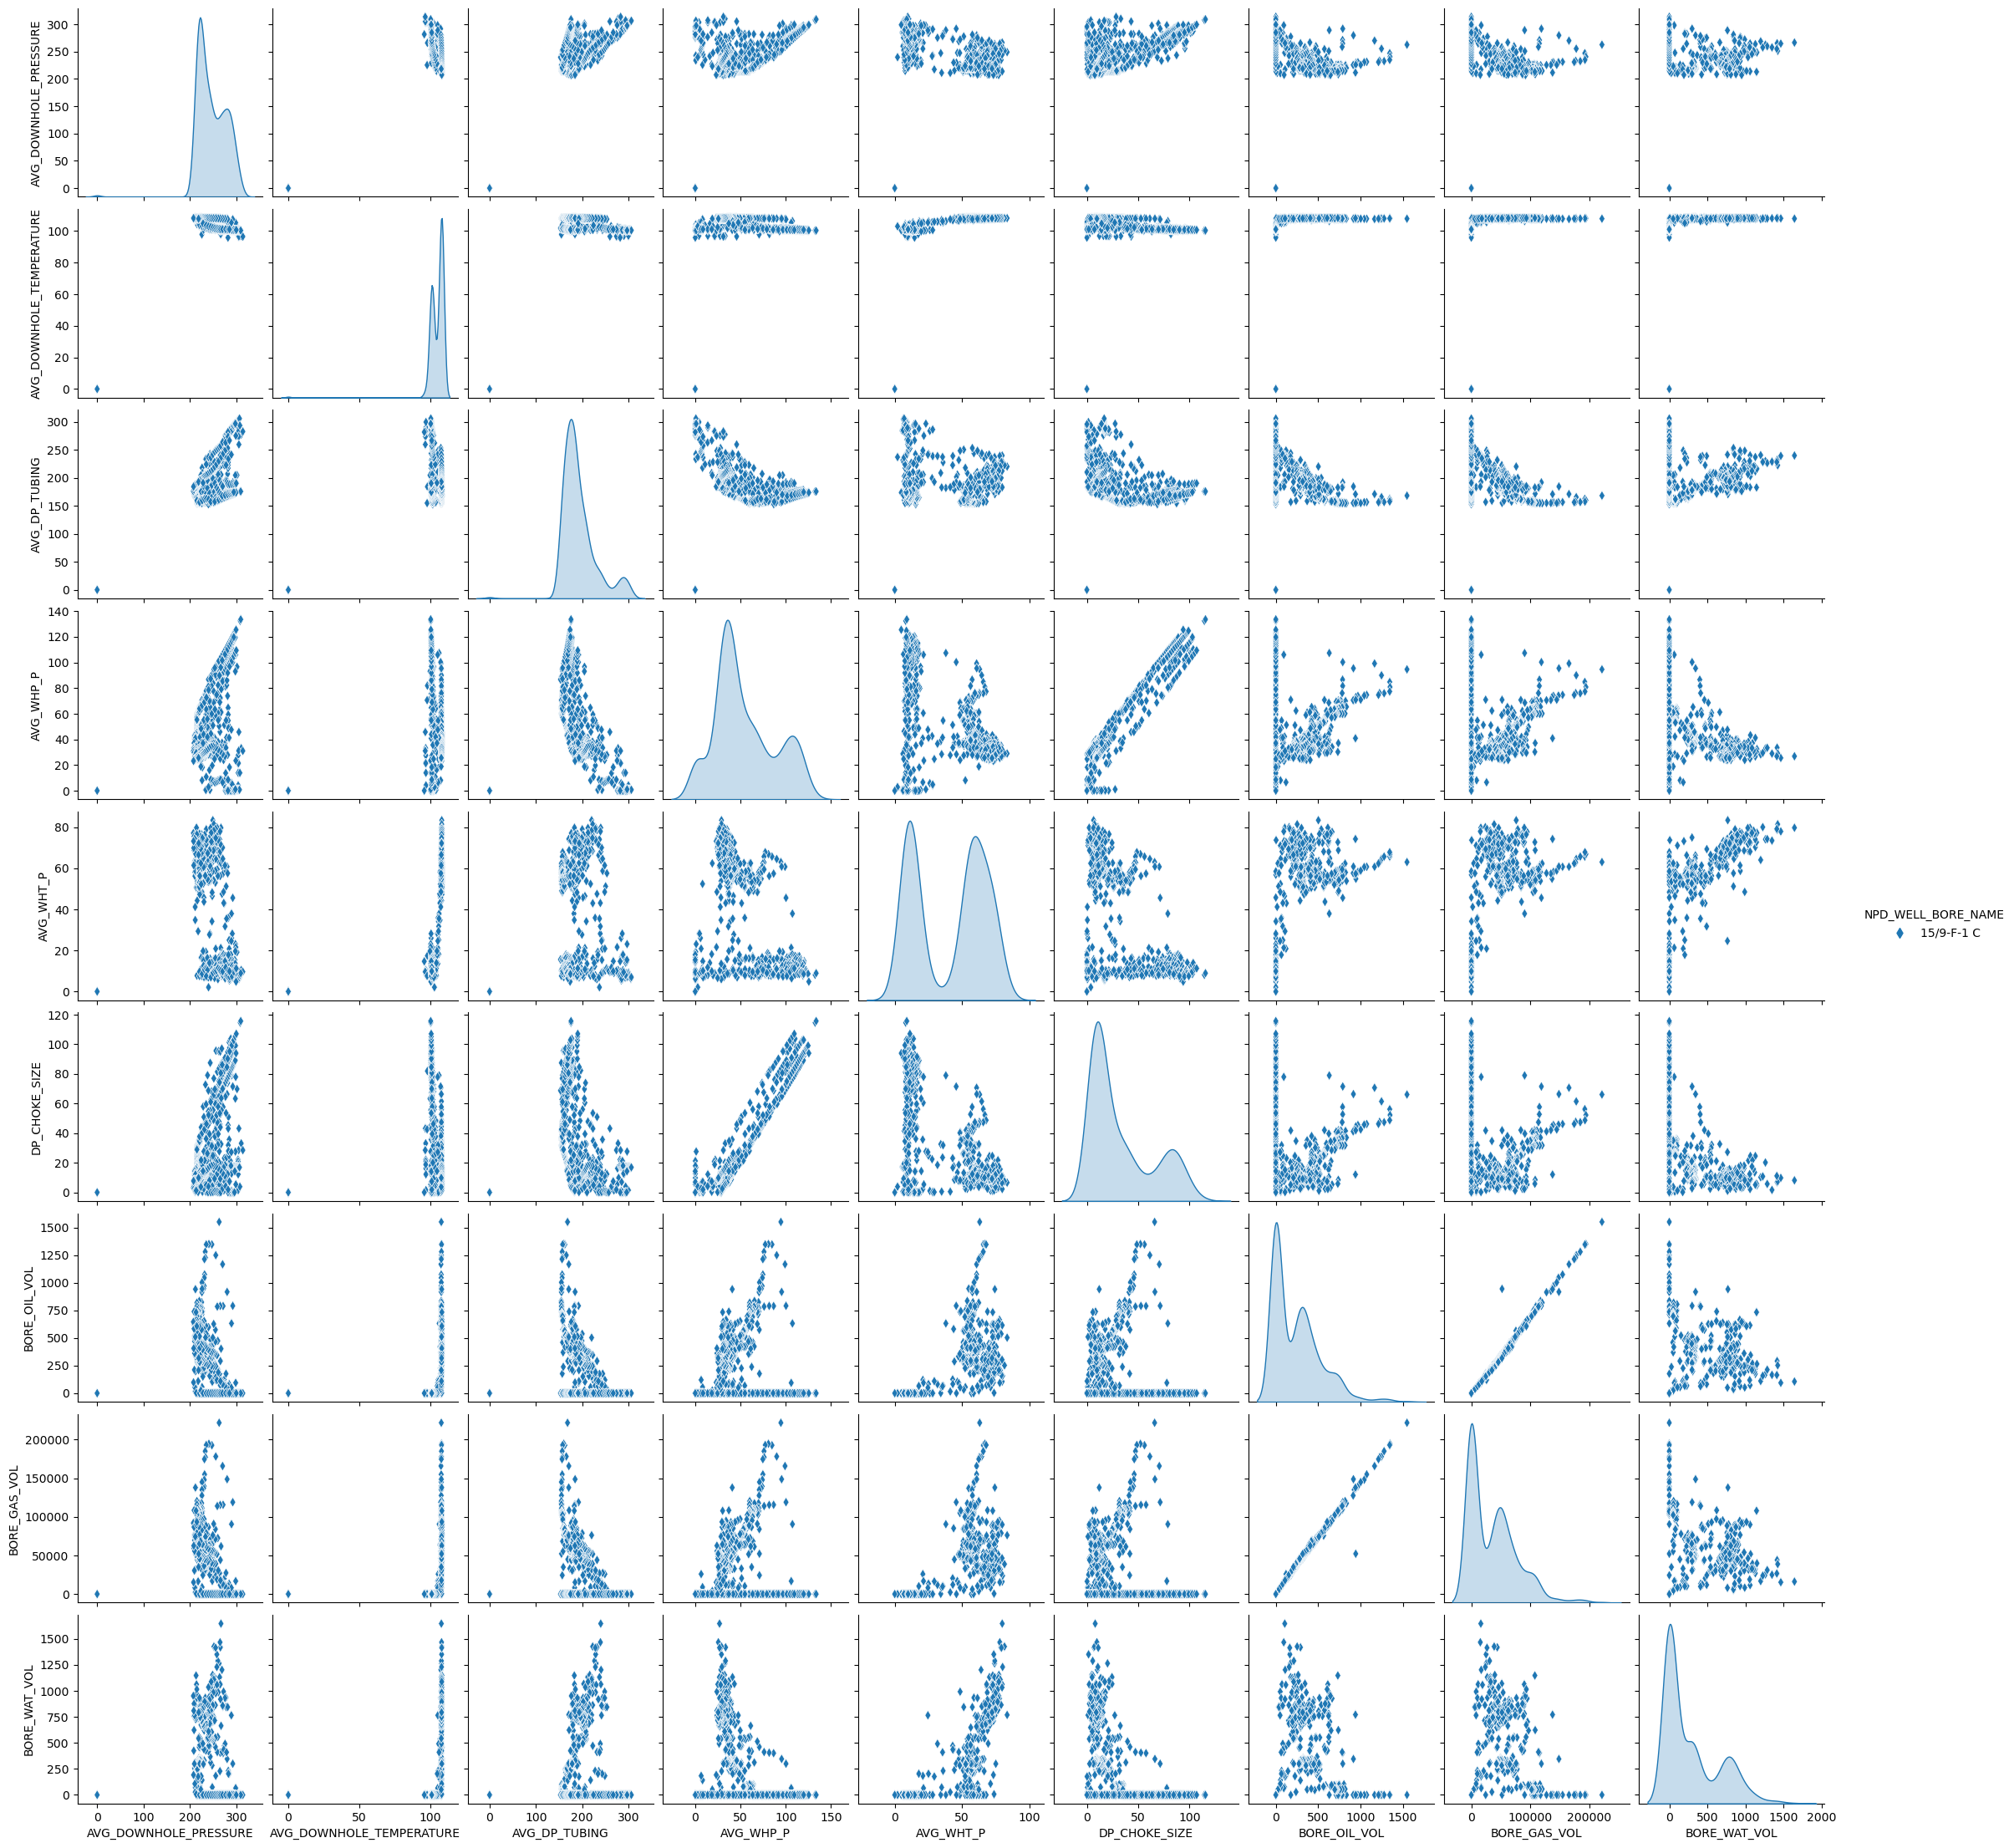

In [ ]:
sns.pairplot(dfnew[dfnew['NPD_WELL_BORE_NAME'] == wellnames[0]], hue="NPD_WELL_BORE_NAME")

In [ ]:

def boxdistplot(well = wellnames):
    df_temp = dfnew[dfnew['NPD_WELL_BORE_NAME'] == well]
    df_temp = df_temp.drop(['DATEPRD','NPD_WELL_BORE_NAME'],axis=1)
    f, axes = plt.subplots(len(df_temp.columns),2, figsize=(20,40))
    for i, colname in enumerate(df_temp.columns):
        sns.boxplot(df_temp[colname], ax = axes[i,1])
        sns.histplot(df_temp[colname], ax = axes[i,0], kde = True)

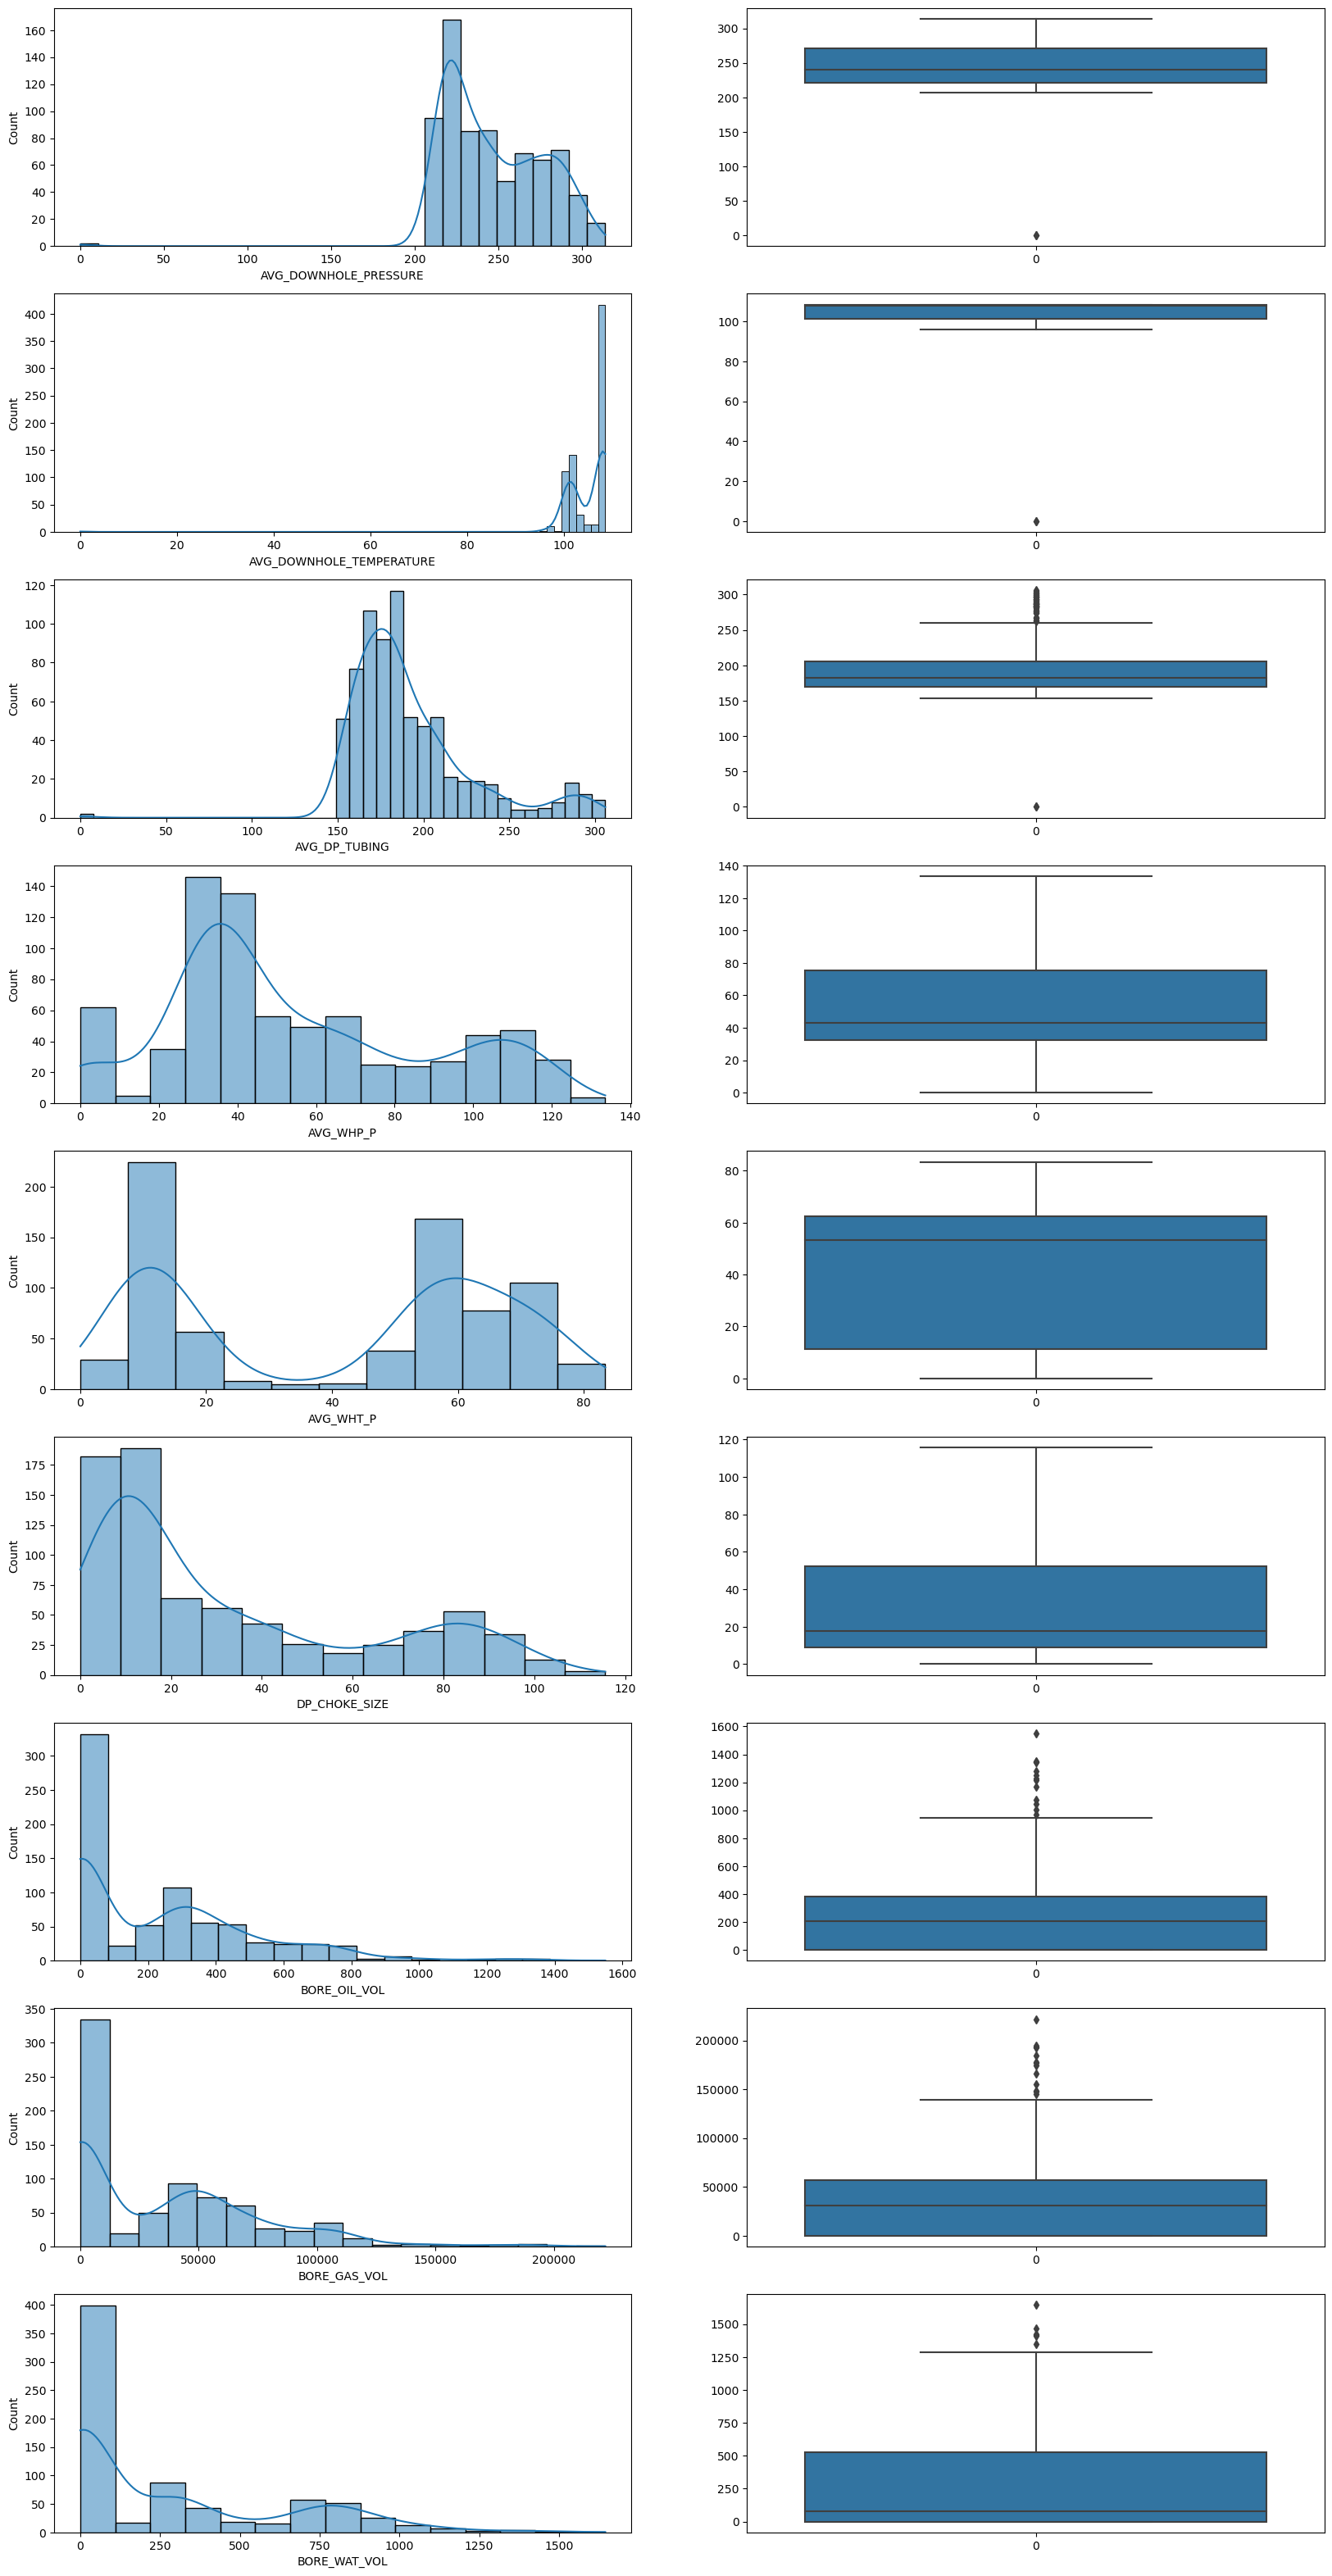

In [ ]:
boxdistplot(wellnames[0])